Prepare rules for the all the data sets

1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values

2) Change the minimum length in apriori algorithm

3) Visulize the obtained rules using different plots

In [2]:
from google.colab import files
upload=files.upload()

Saving book.csv to book.csv


In [3]:
import pandas as pd
df=pd.read_csv("book.csv")
df

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [4]:
df.isna().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

In [5]:
# Apply algorithm
# Apriori Algorithm
!pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5954 sha256=d0f67ddc4a0201d98a70b88f63ec6951b48efe53e8d1f9efe7cc57f38409159e
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [6]:
from apyori import apriori
rules=apriori(transactions = df,
              min_support=0.0003,
              min_confidence=0.2,
              min_lift=3,
              min_length=2,
              max_length=2)
rules
report=list(rules)
report

[RelationRecord(items=frozenset({'C', 'd'}), support=0.09090909090909091, ordered_statistics=[OrderedStatistic(items_base=frozenset({'C'}), items_add=frozenset({'d'}), confidence=0.33333333333333337, lift=3.666666666666667), OrderedStatistic(items_base=frozenset({'d'}), items_add=frozenset({'C'}), confidence=1.0, lift=3.666666666666667)]),
 RelationRecord(items=frozenset({'i', 'C'}), support=0.09090909090909091, ordered_statistics=[OrderedStatistic(items_base=frozenset({'C'}), items_add=frozenset({'i'}), confidence=0.33333333333333337, lift=3.666666666666667), OrderedStatistic(items_base=frozenset({'i'}), items_add=frozenset({'C'}), confidence=1.0, lift=3.666666666666667)]),
 RelationRecord(items=frozenset({'Y', 'D'}), support=0.09090909090909091, ordered_statistics=[OrderedStatistic(items_base=frozenset({'D'}), items_add=frozenset({'Y'}), confidence=1.0, lift=5.5), OrderedStatistic(items_base=frozenset({'Y'}), items_add=frozenset({'D'}), confidence=0.5, lift=5.5)]),
 RelationRecord(it

In [7]:
len(report)

23

In [8]:
report[0]

RelationRecord(items=frozenset({'C', 'd'}), support=0.09090909090909091, ordered_statistics=[OrderedStatistic(items_base=frozenset({'C'}), items_add=frozenset({'d'}), confidence=0.33333333333333337, lift=3.666666666666667), OrderedStatistic(items_base=frozenset({'d'}), items_add=frozenset({'C'}), confidence=1.0, lift=3.666666666666667)])

In [9]:
report[0][1]  #support

0.09090909090909091

In [10]:
report[0][2][0][0]  # 1st order Base item

frozenset({'C'})

In [11]:
report[0][2][0][1]  # 1st order Add item

frozenset({'d'})

In [12]:
report[0][2][0][2]  # 1st order Confidence item

0.33333333333333337

In [13]:
report[0][2][0][3]  # 1st order Lift item

3.666666666666667

In [14]:
report[0][2][1][0]  # 2nd order Base item

frozenset({'d'})

In [15]:
report[0][2][1][1]  # 2nd order Add item

frozenset({'C'})

In [16]:
report[0][2][1][2]  # 2nd order Confidence item

1.0

In [17]:
report[0][2][1][3]  # 2nd order Lift item

3.666666666666667

In [18]:
# Access through the loop
a=[]
b=[]
c=[]
d=[]
e=[]
f=[]
g=[]
h=[]
k=[]

for i in range(0,23):
  a.append(report[i][1]) # support
  b.append(report[i][2][0][0])  # 1st order Base item
  c.append(report[i][2][0][1])  # 1st order Add item
  d.append(report[i][2][0][2])  # 1st order Confidence item
  e.append(report[i][2][0][3])  # 1st order Lift item
  f.append(report[i][2][1][0])  # 2nd order Base item
  g.append(report[i][2][1][1])  # 2nd order Add item
  h.append(report[i][2][1][2])  # 2nd order Confidence item
  k.append(report[i][2][1][3])  # 2nd order Lift item


In [21]:
df["Support"] = pd.DataFrame(a)
df["1st_order_Base_item"] = pd.DataFrame(b)
df["1st_order_Add_item"] = pd.DataFrame(c)
df["1st_order_Confidence_item"] = pd.DataFrame(d)
df["1st_order_Lift_item"] = pd.DataFrame(e)
df["2nd_order_Base_item"] = pd.DataFrame(f)
df["2nd_order_Add_item"] = pd.DataFrame(g)
df["2nd_order_Confidence_item"] = pd.DataFrame(h)
df["2nd_order_Lift_item"] = pd.DataFrame(k)
df

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,...,1st_order_Base_item,1st_order_Add_item,1st_order_Confidence_item,1st_order_Lift_item,2nd_order_Base_item,2nd_order_Add_item,2nd_order_Confidence_item,2nd_order_Lift_item,1st_order_Lift,2nd_order_Lift
0,0,1,0,1,0,0,1,0,0,0,...,C,d,0.333333,3.666667,d,C,1.000000,3.666667,3.666667,3.666667
1,1,0,0,0,0,0,0,0,0,0,...,C,i,0.333333,3.666667,i,C,1.000000,3.666667,3.666667,3.666667
2,0,0,0,0,0,0,0,0,0,0,...,D,Y,1.000000,5.500000,Y,D,0.500000,5.500000,5.500000,5.500000
3,1,1,1,0,1,0,1,0,0,0,...,F,c,1.000000,11.000000,c,F,1.000000,11.000000,11.000000,11.000000
4,0,0,1,0,0,0,1,0,0,0,...,F,e,1.000000,3.666667,e,F,0.333333,3.666667,3.666667,3.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998,0,0,1,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


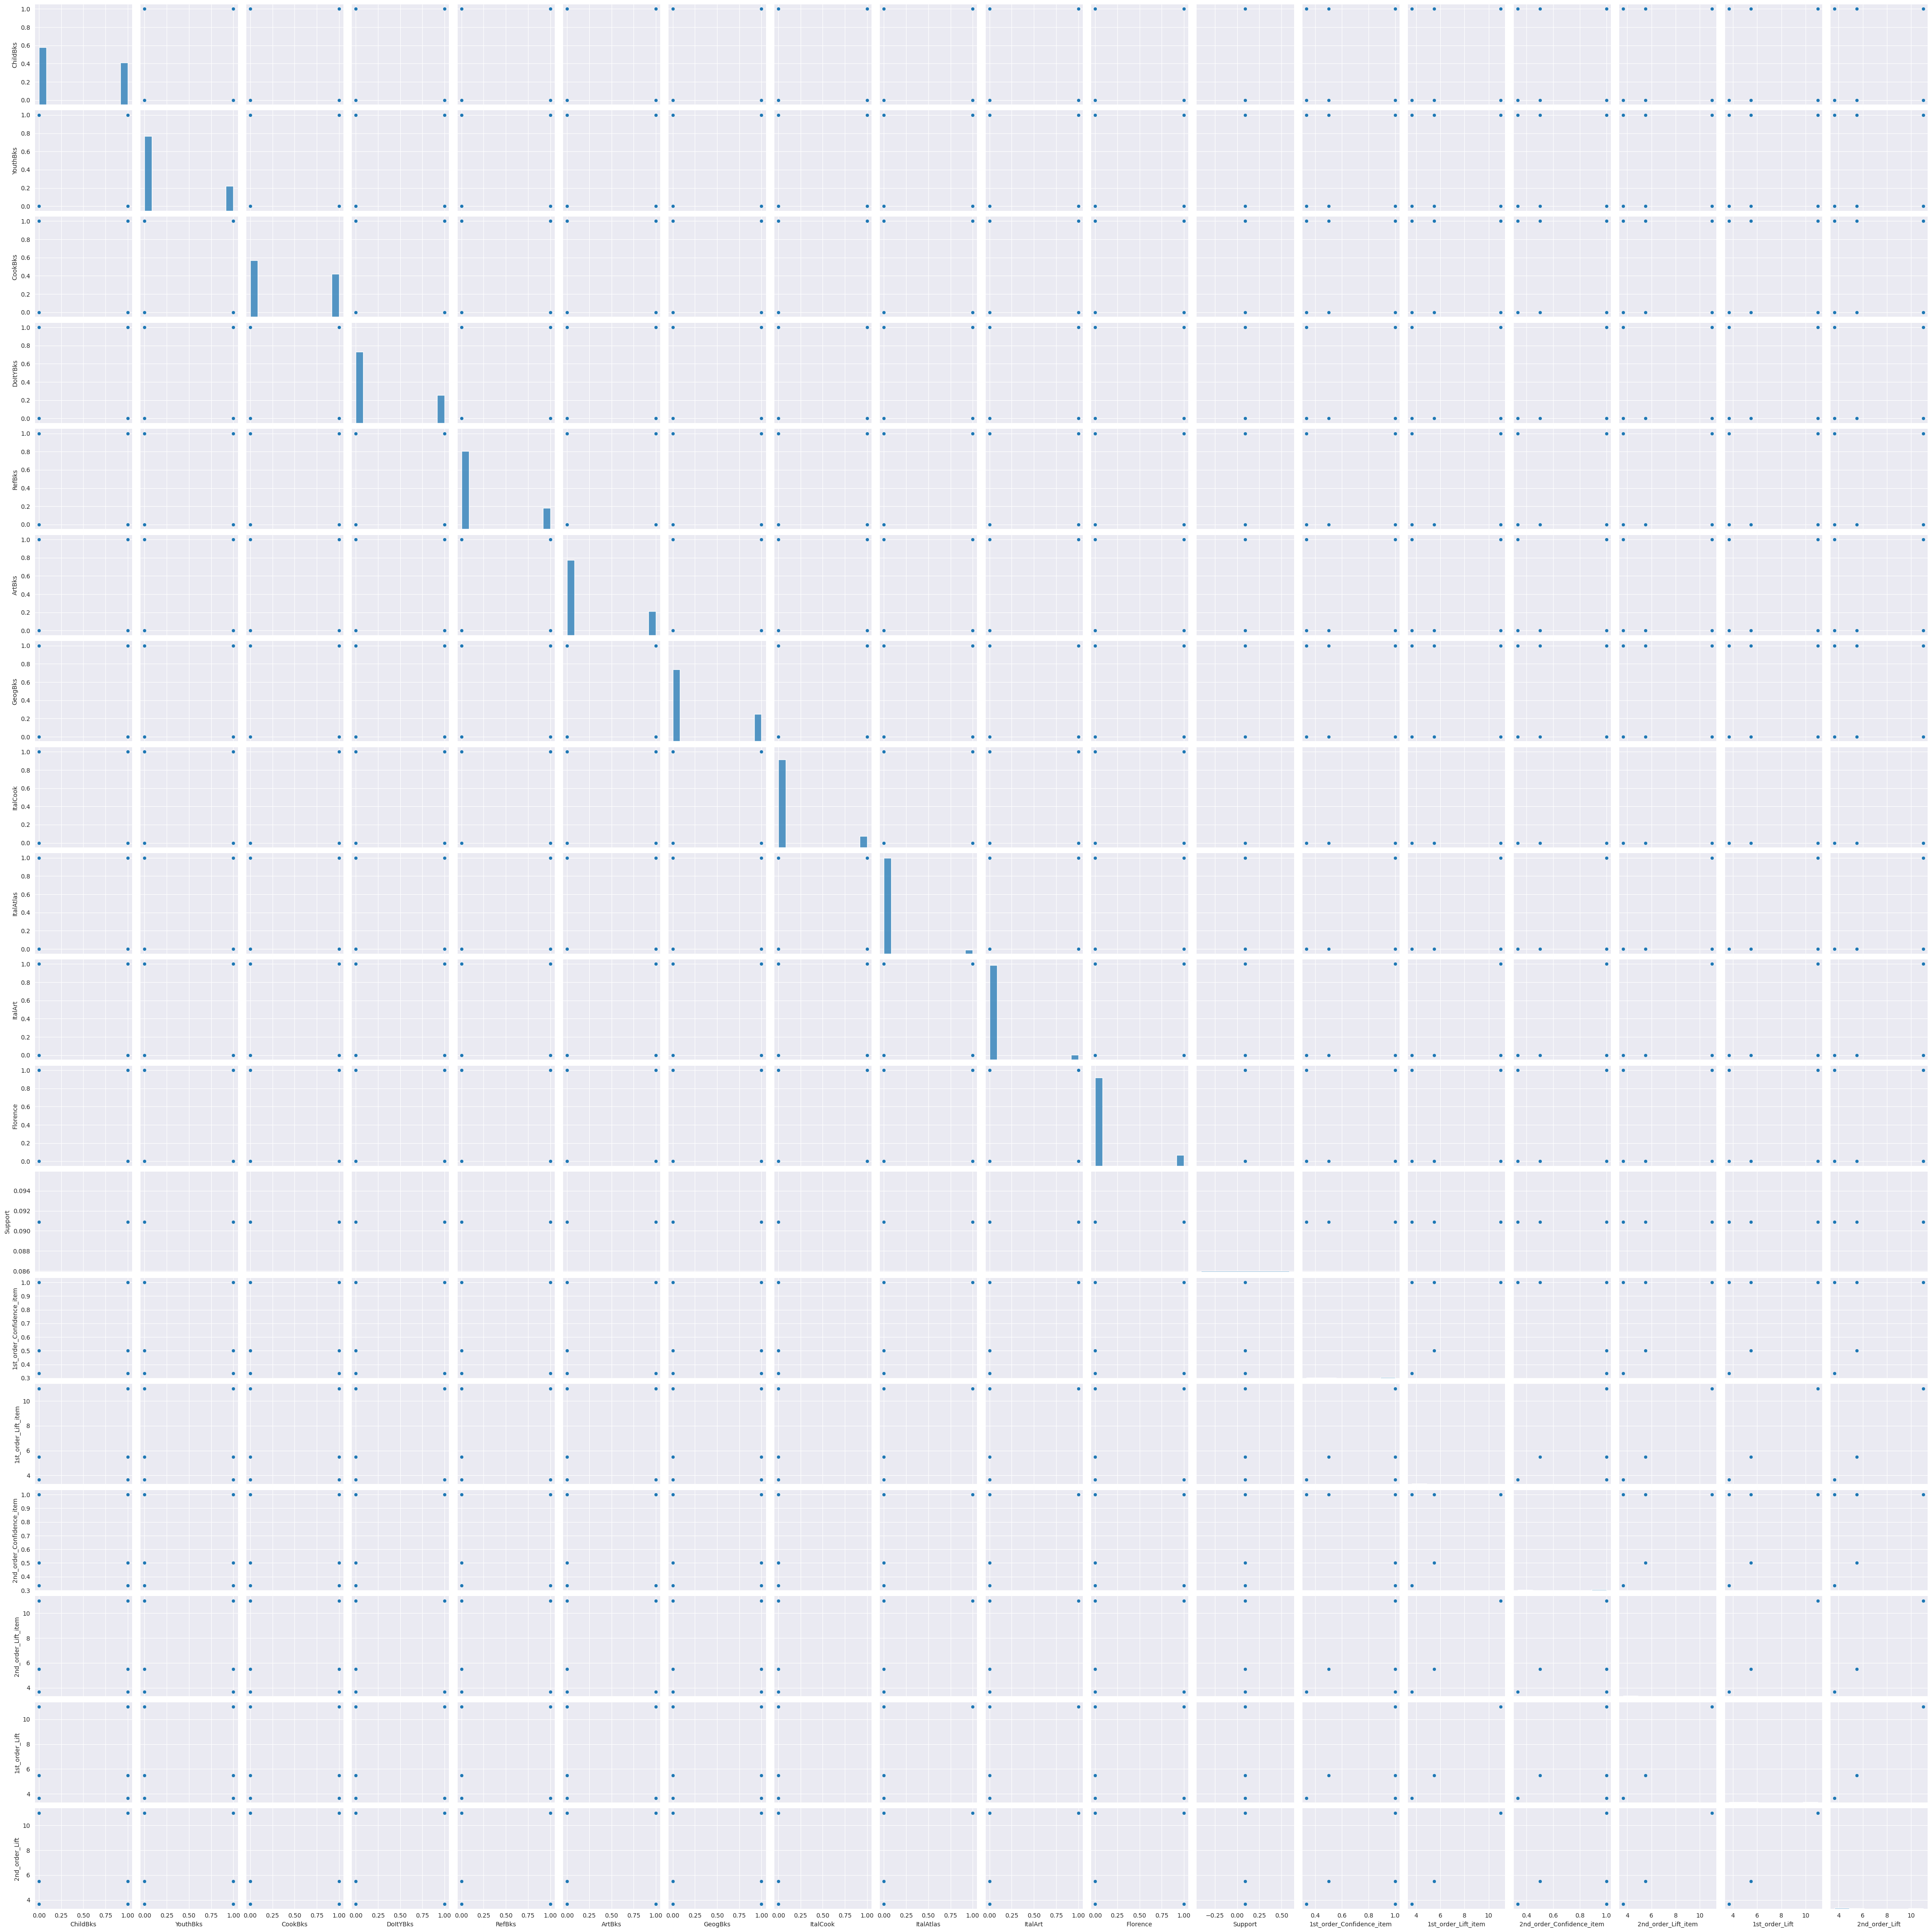

In [22]:
import seaborn as sns
sns.set_style(style="darkgrid")
sns.pairplot(df)